In [14]:
# https://www.kaggle.com/datasets/maxkuz/spotify-electronic-music-dataset

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, LinearRegression, Ridge
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [16]:
df = pd.read_csv('/content/sample_data/Electro_music_on_Spotify.csv')

In [17]:
# df = df.sample(frac = 0.50)

In [18]:
df.head(5)

,track_name,track_id,track_popularity,track_number,explicit,available_markets,artists_names,artists_ids,album_id,main_artist_id,...,positions_and_years_data,dj_score,release_year,release_month,track_name_length,main_artist_name_length,album_name_length,available_markets_count,artists_count,cover_id
0,God Is A Dancer,6mIrY9axk9DkBCk4eHXL6c,41,1,False,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Mabel']","['2o5jDhtHVPhrJdv3cEQ99Z', '1MIVXf74SZHmTIp4V4...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,15,6,19,106,2,ab67616d00001e029759d6dfa2c19091814fccb3
1,Nothing Really Matters,39TATbzOKDwiWdrmuQBLGK,40,2,False,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Becky Hill']","['2o5jDhtHVPhrJdv3cEQ99Z', '4EPJlUEBy49EX1wuFO...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,22,6,19,106,2,ab67616d00001e029759d6dfa2c19091814fccb3
2,Ride,6GpoUPegO1TBbZCoE7FxZ7,38,3,True,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'The Kid Daytona', 'ROE']","['2o5jDhtHVPhrJdv3cEQ99Z', '1U77TS18o4qUO3bwq0...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,4,6,19,106,3,ab67616d00001e029759d6dfa2c19091814fccb3
3,Ritual,0teJO13Uua0AamcZ681qOd,51,4,False,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Jonas Blue', 'Rita Ora']","['2o5jDhtHVPhrJdv3cEQ99Z', '1HBjj22wzbscIZ9sEb...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,6,6,19,106,3,ab67616d00001e029759d6dfa2c19091814fccb3
4,Jackie Chan,4vvnuJlgBeNVwq3TNmLMNX,69,5,True,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Dzeko', 'Preme', 'Post Malone']","['2o5jDhtHVPhrJdv3cEQ99Z', '5vQfv3s2Z2SRdPZKr8...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,11,6,19,106,4,ab67616d00001e029759d6dfa2c19091814fccb3


In [19]:
df.shape

(57460, 50)

In [20]:
# Remove unwanted columns
df = df.drop(columns=['track_id', 'track_number', 'artists_ids', 'album_id', 'main_artist_id',
                      'album_release_date', 'total_tracks', 'type', 'image_url', 'album_label',
                      'born_or_founded_in', 'positions_and_years_data', 'artists_count', 'album_name_length',
                      'track_name_length', 'cover_id', 'followers', 'album_popularity', 'available_markets',
                      'main_artist_name_length', 'available_markets_count', 'duration_sec', 'time_signature',
                      'artist_popularity', 'lowest position', 'mean_position', 'position_std', 'best_position',
                      'times_in_rating', 'dj_score', 'release_year', 'release_month'])

In [21]:
df.columns

Index(['track_name', 'track_popularity', 'explicit', 'artists_names',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'album_name', 'genres', 'artist_name'],
      dtype='object')

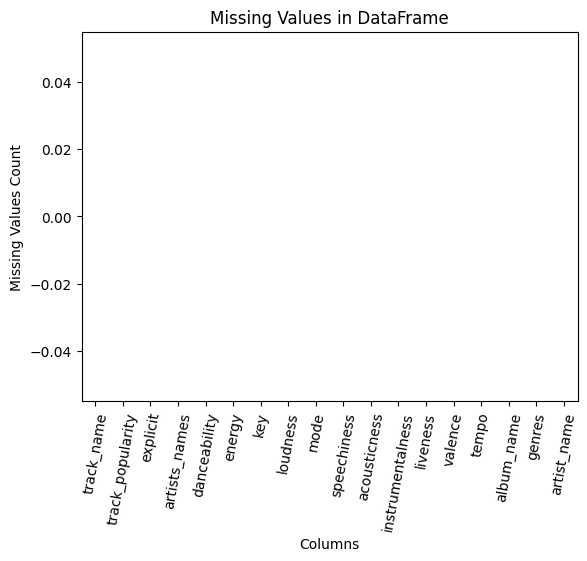

In [22]:
# Count missing values per column
missing_values = df.isnull().sum()

# Plot the missing values
missing_values.plot(kind='bar', rot=80)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values in DataFrame')
plt.show()

In [23]:
# No duplicates in dataset
df_clean = df.drop_duplicates()
print(df_clean.shape)

(56913, 18)


In [24]:
# data (as pandas dataframes)
X = df.drop('track_name', axis=1)
y = df.track_name

# Encode and Transform
le = LabelEncoder()
y = le.fit_transform(y)

# Categorical and Numerical Columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f'Categorical Columns:  {categorical_columns}')
print(f'Numerical Columns:  {numerical_columns}')


Categorical Columns:  ['artists_names', 'album_name', 'genres', 'artist_name']
Numerical Columns:  ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
